In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [6]:
emis = pd.read_csv("CO2_emission.csv")

In [7]:
emis.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [8]:
emis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [10]:
pd.api.types.is_string_dtype(emis["Model_Year"])

False

In [11]:
for label, content in emis.items():
    if pd.api.types.is_string_dtype(content):
        emis[label] = content.astype("category").cat.as_ordered()

In [12]:
emis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Model_Year                              935 non-null    int64   
 1   Make                                    935 non-null    category
 2   Model                                   935 non-null    category
 3   Vehicle_Class                           935 non-null    category
 4   Engine_Size                             935 non-null    float64 
 5   Cylinders                               935 non-null    int64   
 6   Transmission                            935 non-null    category
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64 
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64 
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64 
 10  CO2_Emissions                           935 non-nu

In [14]:
pd.api.types.is_string_dtype(emis["Transmission"])

False

In [16]:
emis.Transmission.cat.codes

0       6
1       7
2       8
3       8
4       8
       ..
930    12
931    12
932    12
933    12
934    12
Length: 935, dtype: int8

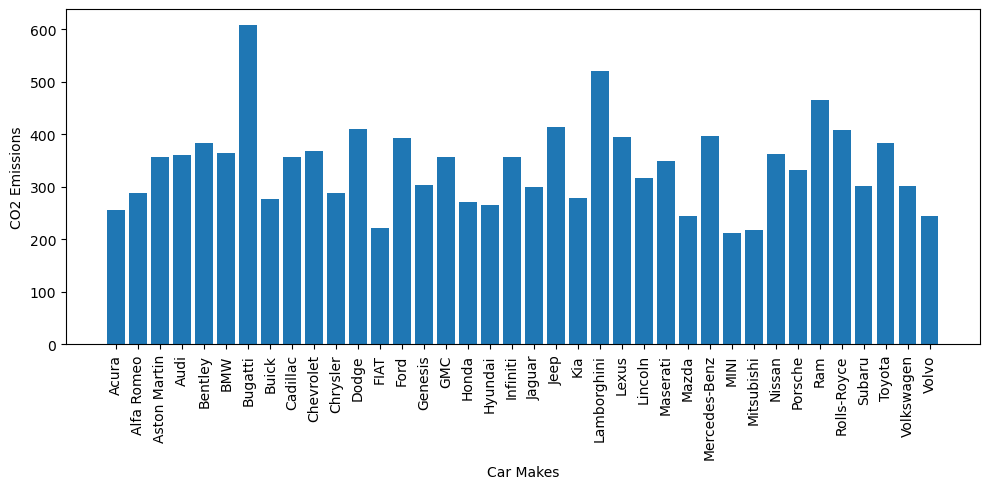

In [38]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(emis["Make"],emis["CO2_Emissions"])
plt.xticks(rotation=90)
plt.xlabel("Car Makes")
plt.ylabel("CO2 Emissions")
plt.tight_layout()

In [41]:
for label, content in emis.items():
    if not pd.api.types.is_numeric_dtype(content):
        emis[label] = pd.Categorical(content).codes     

In [43]:
emis["Make"]

0       0
1       0
2       0
3       0
4       0
       ..
930    37
931    37
932    37
933    37
934    37
Name: Make, Length: 935, dtype: int8

In [44]:
emis2 = pd.read_csv("CO2_emission.csv")

In [45]:
for label, content in emis2.items():
    if pd.api.types.is_string_dtype(content):
        emis2[label] = content.astype("category").cat.as_ordered()

## We have saved our data in emis2 so we can easily check categories later.

In [52]:
emis.sample(n=5)

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
583,2021,23,641,0,2.0,4,17,5.7,6.2,6.0,140,7
821,2021,32,2,6,3.0,6,2,11.1,8.0,9.7,260,1
6,2021,1,332,2,2.0,4,2,10.0,7.2,8.7,205,3
771,2021,31,32,13,4.0,6,21,14.0,10.1,12.2,286,5
913,2021,36,339,0,2.0,4,5,9.7,7.3,8.6,201,7


In [55]:
x = emis.drop("CO2_Emissions",axis=1)
y=  emis["CO2_Emissions"]

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=42)

In [66]:
models={"Random Forest Regression":RandomForestRegressor(),
        "Ridge":linear_model.Ridge(),
        "Lasso":linear_model.Lasso()
}


In [80]:
def check_scores(models,x_train,x_test,y_train,y_test):
    np.random.seed(44)
    
    scores={}
    
    for x,y in models.items():
        y.fit(x_train,y_train)
        scores[x]=y.score(x_test,y_test)
    return scores

In [81]:
check_scores(models,x_train,x_test,y_train,y_test)

c:\Users\fatih\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.784e+01, tolerance: 5.964e+01
  model = cd_fast.enet_coordinate_descent(


{'Random Forest Regression': 0.9204072835382108,
 'Ridge': 0.9489394699181515,
 'Lasso': 0.948849781247042}

### Ridge has performed better than other models so we are choosing Ridge.

In [83]:
linear_model.Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

### Randomized Search CV

In [106]:
params={"solver":["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
        "alpha": np.arange(1,1000,100),
}

In [107]:
rsc=RandomizedSearchCV(linear_model.Ridge(),
                        param_distributions=params,
                        cv=5,
                        n_iter=20,
                        verbose=True)


In [108]:
rsc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901]),
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   verbose=True)

In [110]:
rsc.score(x_test,y_test)

0.945711388000414

In [112]:
check_scores(models,x_train,x_test,y_train,y_test)

c:\Users\fatih\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.784e+01, tolerance: 5.964e+01
  model = cd_fast.enet_coordinate_descent(


{'Random Forest Regression': 0.9204072835382108,
 'Ridge': 0.9489394699181515,
 'Lasso': 0.948849781247042}

### After performing randomized search cv our models performs worse,lets try grid search.


In [115]:
gs=GridSearchCV(linear_model.Ridge(),
                          param_grid=params,
                          cv=5,
                          verbose=True)

In [119]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             verbose=True)

In [121]:
gs.score(x_test,y_test)

0.9449114992988381

In [122]:
lmr = linear_model.Ridge()


In [123]:
lmr.fit(x_train,y_train)

Ridge()

In [124]:
lmr.score(x_test,y_test)

0.9489394699181515

In [125]:
y_preds = lmr.predict(x_test)

In [134]:
metrics.max_error(y_test,y_preds)

94.93832029530165

In [138]:
Evaluation_Scores={"Max Error":metrics.max_error(y_test,y_preds),
                     "Absolute Error":metrics.mean_absolute_error(y_test,y_preds),
                    "R2score":metrics.r2_score(y_test,y_preds),
                  index=[0]}

In [139]:
Evaluation_Scores

{'Max Error': 94.93832029530165,
 'Absolute Error': 9.231841541482654,
 'R2score': 0.9489394699181515}

In [159]:
fea=lmr.coef_.reshape(11,1)

In [228]:
i=-1
while 10>i:
    i+=1
    print(fea[i][0])
    

0.0
0.03485324287260365
-0.004927350295576797
0.26103270553806796
3.585368430657051
2.511730037284618
-0.19560667117879382
4.449700684264505
4.0249244940162034
8.648468421619949
-1.4773453927930285


In [233]:
features={'Model_Year':0.0, 'Make':0.03485324287260365, 'Model':-0.004927350295576797, 'Vehicle_Class':0.26103270553806796, 
          'Engine_Size':0.26103270553806796,
       'Cylinders':3.585368430657051, 'Transmission':2.511730037284618, 
          'Fuel_Consumption_in_City(L/100 km)':-0.19560667117879382,
       'Fuel_Consumption_in_City_Hwy(L/100 km)':4.449700684264505,
       'Fuel_Consumption_comb(L/100km)':4.0249244940162034, 'CO2_Emissions':8.648468421619949, 'Smog_Level':-1.4773453927930285
    
    
    
    
}

In [230]:
emis.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

In [234]:
features

{'Model_Year': 0.0,
 'Make': 0.03485324287260365,
 'Model': -0.004927350295576797,
 'Vehicle_Class': 0.26103270553806796,
 'Engine_Size': 0.26103270553806796,
 'Cylinders': 3.585368430657051,
 'Transmission': 2.511730037284618,
 'Fuel_Consumption_in_City(L/100 km)': -0.19560667117879382,
 'Fuel_Consumption_in_City_Hwy(L/100 km)': 4.449700684264505,
 'Fuel_Consumption_comb(L/100km)': 4.0249244940162034,
 'CO2_Emissions': 8.648468421619949,
 'Smog_Level': -1.4773453927930285}

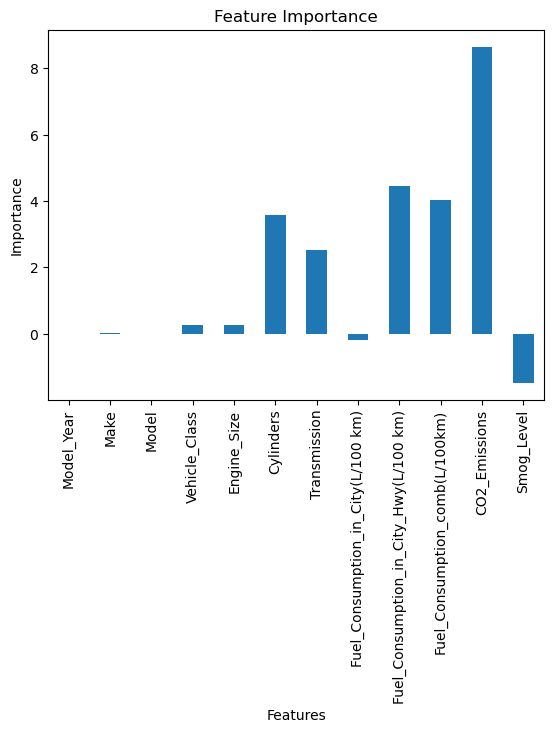

In [242]:
features2 = pd.DataFrame(features, index=[0])
features2.T.plot.bar(title="Feature Importance", legend=False,ylabel="Importance",xlabel="Features");

In [251]:
Evaluation_Scores={"Max Error":metrics.max_error(y_test,y_preds),
                     "Absolute Error":metrics.mean_absolute_error(y_test,y_preds),
                    "R2score":metrics.r2_score(y_test,y_preds),
                }

In [253]:
cv_metrics=pd.DataFrame(Evaluation_Scores,
                  index=[0])

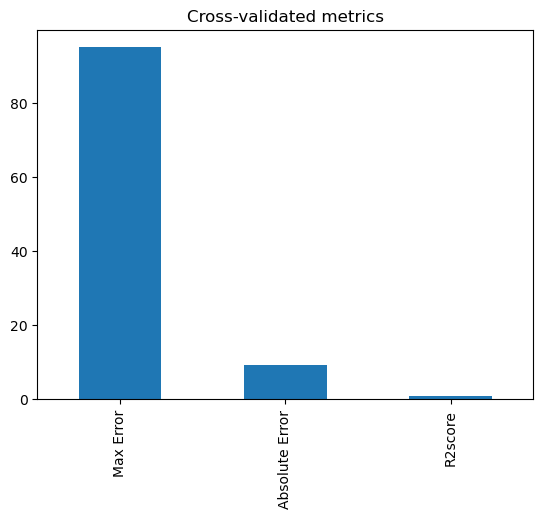

In [255]:
cv_metrics.T.plot.bar(title="Cross-validated metrics",
                      legend=False);